In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from soccerplots.radar_chart import Radar

In [3]:
df_player1=pd.read_html('https://fbref.com/en/players/49296448/Joshua-Kimmich')[0]
df_player1=df_player1.dropna() 
df_player1.reset_index(drop=True,inplace=True)
df_player1

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.19,91.0
1,npxG,0.13,89.0
2,Shots Total,1.47,83.0
3,Assists,0.40,99.0
4,xA,0.26,98.0
5,npxG+xA,0.39,97.0
6,Shot-Creating Actions,4.64,98.0
7,Passes Attempted,84.80,97.0
8,Pass Completion %,83.4%,45.0
9,Progressive Passes,9.17,99.0


In [4]:
# delete % character on 8th row
df_player1.at[8,'Per 90'] = df_player1.at[8,'Per 90'][:-1]
df_player1

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.19,91.0
1,npxG,0.13,89.0
2,Shots Total,1.47,83.0
3,Assists,0.40,99.0
4,xA,0.26,98.0
5,npxG+xA,0.39,97.0
6,Shot-Creating Actions,4.64,98.0
7,Passes Attempted,84.80,97.0
8,Pass Completion %,83.4,45.0
9,Progressive Passes,9.17,99.0


In [5]:
# parameter list
params = [
    "Non-Penalty Goals", "npxG", "Assists","xA","Shots Total","Shot-Creating Actions",
    "Interceptions","Clearances","Aerials won",
    "Passes Attempted","Pass Completion %","Progressive Passes","Progressive Carries","Dribbles Completed","Touches (Att Pen)"
]

values_player1=[]
for i in range(15):
    for j in range(20):
      if(params[i]==df_player1['Statistic'][j]):
        values_player1.append(df_player1['Per 90'][j])
print(values_player1)

['0.19', '0.13', '0.40', '0.26', '1.47', '4.64', '1.88', '1.15', '0.72', '84.80', '83.4', '9.17', '7.32', '0.75', '1.39']


In [9]:
values_p90=[]
max_values=[]
min_values=[0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
for i in range(15):
    for j in range(20):
      if(params[i]==df_player1['Statistic'][j]):
        values_p90.append(df_player1['Per 90'][j])
        max_values.append(np.float32((np.float32(df_player1['Per 90'][j])/np.float32(df_player1['Percentile'][j]))*100))
print(max_values)
print(values_p90)

[0.20879121, 0.14606741, 0.40404043, 0.26530612, 1.7710844, 4.734694, 2.35, 3.4848485, 2.5714288, 87.42268, 185.33333, 9.262627, 7.870968, 1.5957447, 2.1384616]
['0.19', '0.13', '0.40', '0.26', '1.47', '4.64', '1.88', '1.15', '0.72', '84.80', '83.4', '9.17', '7.32', '0.75', '1.39']


In [10]:
# str to float
new_values_p90 = []
for item in values_p90:
    new_values_p90.append(float(item))
print(new_values_p90)

[0.19, 0.13, 0.4, 0.26, 1.47, 4.64, 1.88, 1.15, 0.72, 84.8, 83.4, 9.17, 7.32, 0.75, 1.39]


In [18]:
ranges = []

for x in range(len(new_values_p90)):
    a = min_values[x]
    b = max_values[x]
    ranges.append((a,b))
print(ranges)

[(0.0, 0.20879121), (0.0, 0.14606741), (0.0, 0.40404043), (0.0, 0.26530612), (0.0, 1.7710844), (0.0, 4.734694), (0.0, 2.35), (0.0, 3.4848485), (0.0, 2.5714288), (0.0, 87.42268), (0.0, 185.33333), (0.0, 9.262627), (0.0, 7.870968), (0.0, 1.5957447), (0.0, 2.1384616)]


In [36]:
title = dict(
    title_name='Joshua Kimmich - FC Bayern',
    title_color = 'red',
    subtitle_name = 'Per90 Rank vs Top-Five League Midfielders | Season 2020-21',
    subtitle_color = 'red',
    title_fontsize = 18,
    subtitle_fontsize=15
)

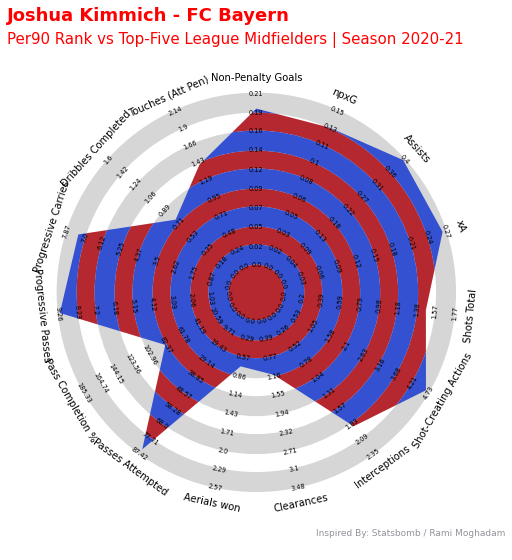

In [40]:
radar = Radar()

fig, ax = radar.plot_radar(ranges=ranges, params=params, values=new_values_p90, title=title,
                                 radar_color=['#B6282F', '#3451d1'])

fig.savefig('outputs/Kimmich-per90RadarChart.png', dpi=200, facecolor=fig.get_facecolor(), edgecolor='None', transparent=True)